In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

boston_data = load_boston() 
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names) 
target = boston_data.target

Here is a brief description of our dataset:

- CRIM crime rate per capita by city
- ZN share of residential land zoned for plots with an area of ​​more than 25,000 sq. ft.
- INDUS share of acres of non-trade business by city
- CHAS Charles River dummy (= 1 if the site borders a river; 0 if present)
- NOX concentration of nitrogen oxides (parts per 10 million)
- RM average number of rooms in a dwelling
- AGE share of owner-occupied apartments built before 1940
- DIS weighted visits to five Boston employment centers
- RAD index of accessibility to radial highways
- TAX Full rate property tax on $10,000
- PTRATIOS student-teacher ratio by city
- B 1000(Bk - 0.63)^2, where Bk is the proportion of the black population in the city.

- LSTAT % lower population status
- TARGET Median value of owner-occupied homes in $1,000

In [2]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
boston_df.shape

(506, 13)

In [5]:
boston_df['Price'] = target
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


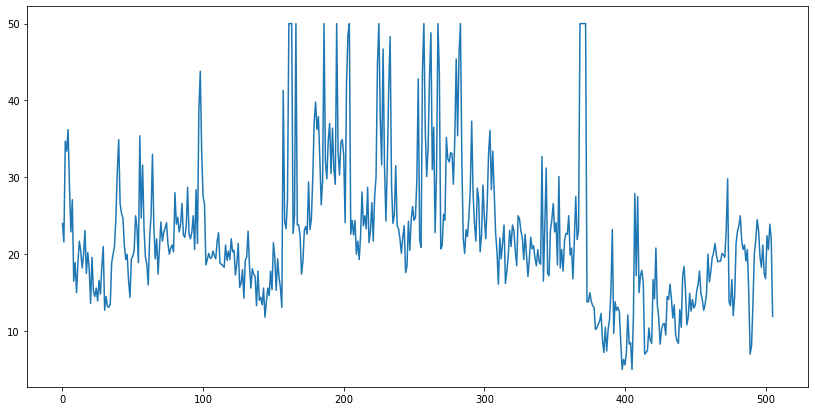

In [6]:
plt.figure(figsize=(14,7))
plt.plot(boston_df.Price)
plt.show()

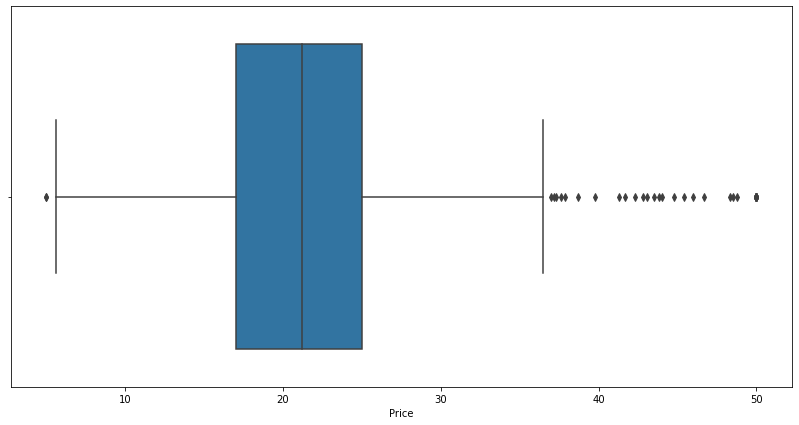

In [7]:
plt.figure(figsize=(14,7))
sns.boxplot(boston_df.Price)
plt.show()

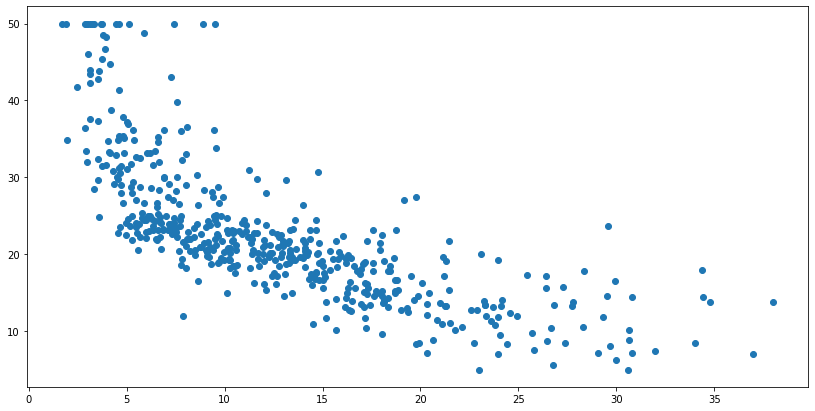

In [8]:
plt.figure(figsize=(14,7))
plt.scatter(boston_df['LSTAT'], target)
plt.show()

On the X axis we have LSTAT, and on the Y axis we have TARGET. Just by looking at it, you can see a negative relationship: when LSTAT goes up, TARGET goes down.


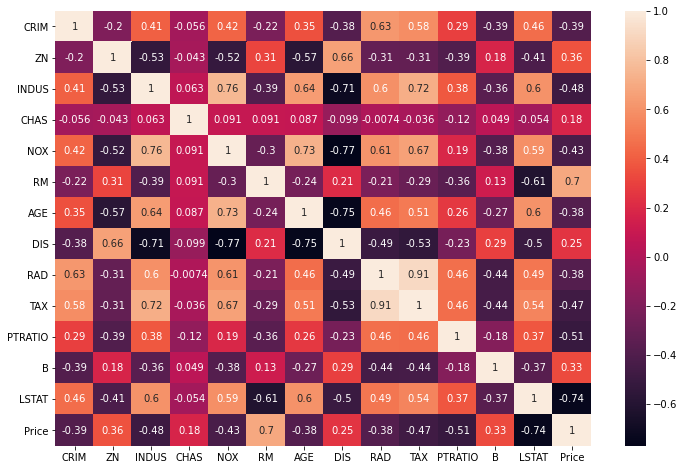

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(boston_df.corr(),annot=True)
plt.show()

Having considered this correlation matrix, one can see the dependent factors among themselves. There are also coefficients that are close to 0, which indicates that there is no relationship between the variables.


# Gradient Descent method, with which we can find the minimum of the function


This method will find the global minimum if the function is convex. Otherwise, we can only be sure that we will reach a local minimum.

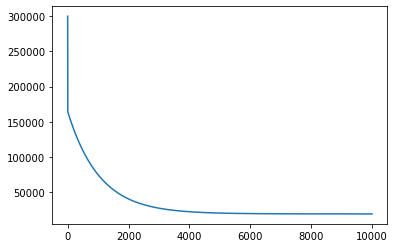

In [10]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
lstat_values = boston_df.LSTAT.values
n = len(lstat_values)
all_mse = []

for _ in range(10000):
    predicted = beta_0 + beta_1 * lstat_values
    residuals = target - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(lstat_values) * -1)
    
plt.plot(range(len(all_mse)), all_mse);

The first plot shows the MSE value during gradient descent. As expected, the MSE decreases over time as the algorithm runs. This means that we are constantly getting closer to the optimal solution.

This graph shows the value of MSE during gradient descent. As expected, the MSE decreases over time as the algorithm runs. This means that we are constantly getting closer to the optimal solution.

Beta 0: 34.27230357706076
Beta 1: -0.9331466362919295


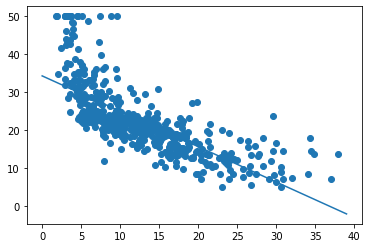

In [11]:
print(f"Beta 0: {beta_0}")
print(f"Beta 1: {beta_1}")
plt.scatter(boston_df['LSTAT'], target)
x = range(0, 40)
plt.plot(x, [beta_0 + beta_1 * l for l in x]);

Thus, the gradient descent method showed that the optimal displacement is 34.27, and the optimal slope is -0.93. This line is shown on top of our data and looks like a fitting straight line.

# Linear Regression via Scikit-learn

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston_df) 
scaled_df = scaler.transform(boston_df)


Let's use the `SGDRegressor` function, it performs a linear regression using gradient descent and takes a trace. arguments: `tol` (tells the model when to stop iteration) and `eta0` (initial learning rate)

In [13]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.04212100474148246


As a result, our RMSE was 4.68 for our training set

Considering the cost plot from LSTAT built above, you can see that there is a polynomial relationship between these indicators. Linear regression works well in the case of a linear relationship, but if we add polynomial measures such as LSTAT, more complex relationships can be established. Let's use these from the SKLearn library

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(boston_df) 
scaled_poly_df = scaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")


linear_regression_model.fit(scaled_poly_df, target)
predictions = linear_regression_model.predict(scaled_poly_df) 
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

shape: (506, 119)
RMSE: 0.21575397880785277


the `PolynomialFeatures` function has generated a new feature matrix consisting of all their polynomial combinations with a degree less than or equal to the specified one. Then we normalized the data and got an improved training RMSE of 3.24

# Linear Regression 

In [15]:
linear_regression_model.fit(scaled_df, target) 
sorted(list(zip(boston_df.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

[('CHAS', -0.0016626713549787139),
 ('RM', 0.0029338870977523757),
 ('B', 0.004774942558340986),
 ('AGE', 0.0087017767164085),
 ('CRIM', -0.01658635435711599),
 ('PTRATIO', -0.02055296146131336),
 ('ZN', 0.02675277990975458),
 ('LSTAT', -0.031419577099775116),
 ('DIS', -0.03932046563979827),
 ('INDUS', 0.039562094251358516),
 ('NOX', -0.04285098410885185),
 ('RAD', 0.12326428289079766),
 ('TAX', -0.12361475920245847),
 ('Price', 9.133188234254504)]

All coefficients represent the average change in house prices per unit change in the respective indicator, assuming all other indicators remain constant.
For example, if the values ​​of other indicators are not affected, then increasing LSTAT by one reduces the target (housing price) by 0.031, and increasing RM increases it by 0.003
That is, if we want to increase the value of a house, we can start by increasing RM and decreasing LSTAT.

In [16]:
from sklearn.utils import resample

n_bootstraps = 1000 
bootstrap_X = [] 
bootstrap_y = [] 

for _ in range(n_bootstraps): 
    sample_X, sample_y = resample(scaled_df, target)
    bootstrap_X.append(sample_X) 
    bootstrap_y.append(sample_y)

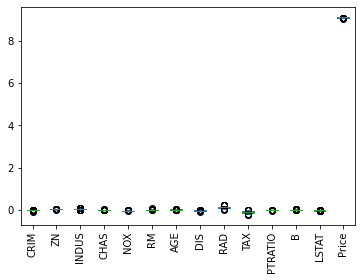

In [17]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = [] 

for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)
    
coef_df = pd.DataFrame(coeffs, columns=boston_df.columns) 
coef_df.plot(kind='box') 
plt.xticks(rotation=90);

On this range diagram, the values ​​of the coefficients were obtained for all the models that we trained. The AGE score is very interesting as the values ​​were both positive and negative, which is a good indication that there is no correlation between age and cost.

count    1000.000000
mean       -0.032298
std         0.009149
min        -0.063799
25%        -0.037972
50%        -0.032336
75%        -0.026590
max         0.000837
Name: LSTAT, dtype: float64


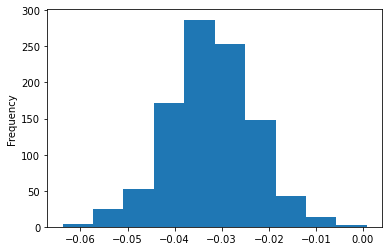

In [18]:
print(coef_df['LSTAT'].describe())
coef_df['LSTAT'].plot(kind='hist');

We can confidently say that the LSTAT coefficient is negative and will most likely be between -2 and -5.5

# Divide into training and test dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, 
                                                    target, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [20]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(X_train, y_train)

train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.0029759162993053512
Test MSE: 0.0029215476794058216


We get RMS errors for both training and testing data. The values ​​turned out to be quite close, which indicates that there is no overfitting problem.

We will also plot a training plot where the learning curve will plot our MSE error function with different amounts of data used for training.

Let's use the example from the official scikit-learn website and build this model.
http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html

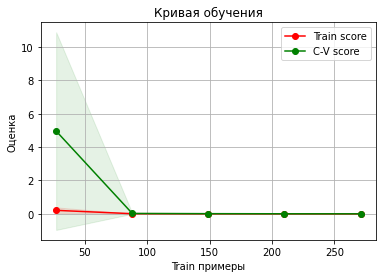

In [21]:
# Source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train примеры")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linear_regression_model, "Кривая обучения", X_train, y_train, cv=5);

it can be seen that with less than 50 training examples, the training MSE is not bad.

Also consider the LinearRegression function

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg1=LinearRegression()

In [24]:
x=boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values

y=boston_df['Price'].values

In [25]:
reg1.fit(x,y)

LinearRegression()

In [26]:
reg1.score(x,y) #R^2 -where we check the price dependence relative to all other indicators

0.7406426641094095

In [27]:
y_predict1=reg1.predict(x)

In [28]:
from sklearn.metrics import r2_score # for the highest accuracy, re-check our R^2

In [29]:
r2score1=r2_score(y,y_predict1) 
r2score1

0.7406426641094095

# МНК

In [30]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [31]:
import statsmodels.api as sm

X=boston_df['LSTAT']
y=boston_df['Price']

In [32]:
# здесь прогоним под модель мнк с одной функцией lstat

X_constant=sm.add_constant(X)  #adding constant to the x variable
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.08e-88
Time:                        01:02:41   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X=boston_df.drop(['Price'],axis=1)
y=boston_df['Price']

X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [34]:
y.head(1)

0    24.0
Name: Price, dtype: float64

In [35]:
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        01:02:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Durbin Watson's odds are 1.078

Consider the remainders
Balance = Actual - Forecast

In [37]:
lin_reg.resid.head()

0   -6.003843
1   -3.425562
2    4.132403
3    4.792964
4    8.256476
dtype: float64

In [38]:
lin_reg.predict(X_constant).head()   #yPredict

0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
dtype: float64

In [39]:
y.head()  #residual y-yPredict   (ie actual - predidcted )

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [40]:
# Let us also estimate the autocorrelation function
import statsmodels.tsa.api as smt

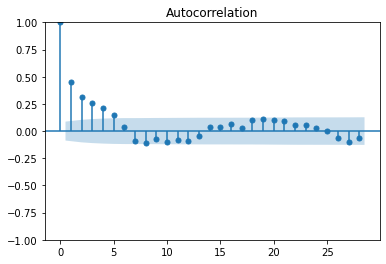

In [41]:
acf = smt.graphics.plot_acf(lin_reg.resid)
acf.show()

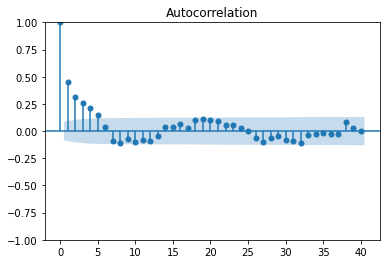

In [42]:
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40)
acf.show()

The above graph has a positive autocorrelation since it has a cycle graph and coefficient. DV=1.078. THEN It can be concluded that it is better to use data without autocorrelation

Graphically consider the linearity

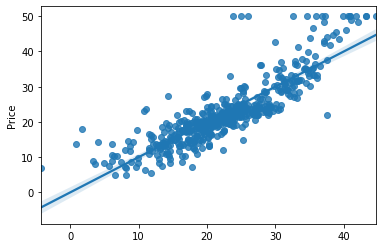

In [43]:
sns.regplot(x=lin_reg.predict(X_constant),y=y)
plt.show()

Здесь мы видим, все ли точки находятся на прямой, если да, то данные линейны.

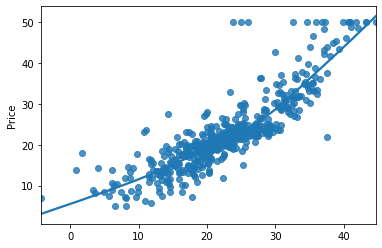

In [44]:
# Use the lowess parameter for greater accuracy, if after lowess it is not a straight line, then it is non-linear

sns.regplot(x=lin_reg.predict(X_constant),y=y, lowess=True)
plt.show()  

# We use the lowess parameter when we want to be more precise about whether our data is linear or not.